# Linear Regression 
A company is trying to decide whether to focus their efforts on their mobile app experience or their website for their online clothing store. They also have in-store style and clothing advice sessions. This is linear regresion machine learning problem and we will be using the scikit-learn machine learning package for Python for this project.

All the customers data including emails and credit card numbers is fake. This is for demonstration purposes only.

Let's get started!

## Imports

Importing the analysis libraries

In [5]:
import pandas as pd
import numpy as np

Importing the visualization libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## Getting the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Reading the data file as a dataframe named customers.

In [7]:
customers = pd.read_csv('Ecommerce Customers')

**Checking the head of customers dataframe and its info() and describe() methods for some bird'eye view on the details of this data set.**

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. We will also see if the correlation makes any sense.

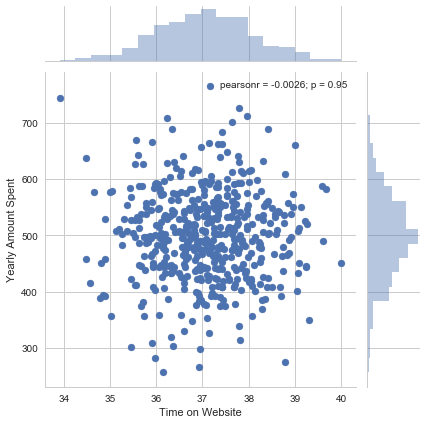

In [11]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers)

There doesn' appear to be a clear correlation between the time time spent by the customer on the company's website and their yearly purchase amounts just by visually looking at the graph.

Doing the same but with the Time on App column instead.

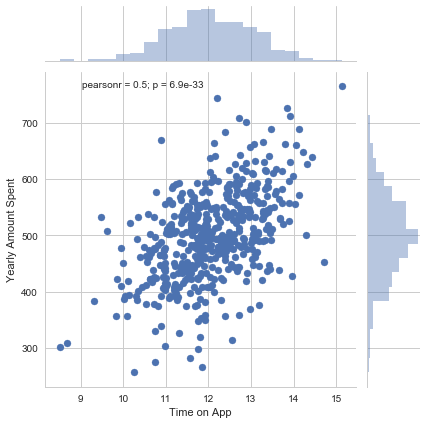

In [12]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)

We do see some correlation between the time spent on app by customers and their yearly spending amount to buy the products.

We will use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

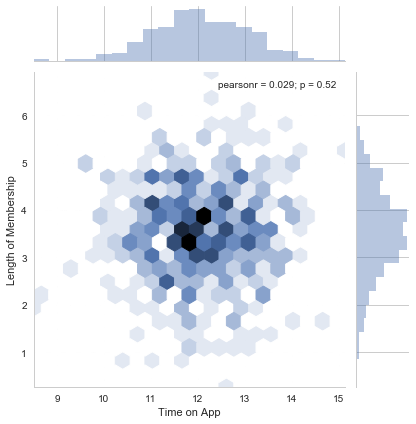

In [13]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex')

Let's explore these types of relationships across the entire data set. Using pairplot for this purpose.

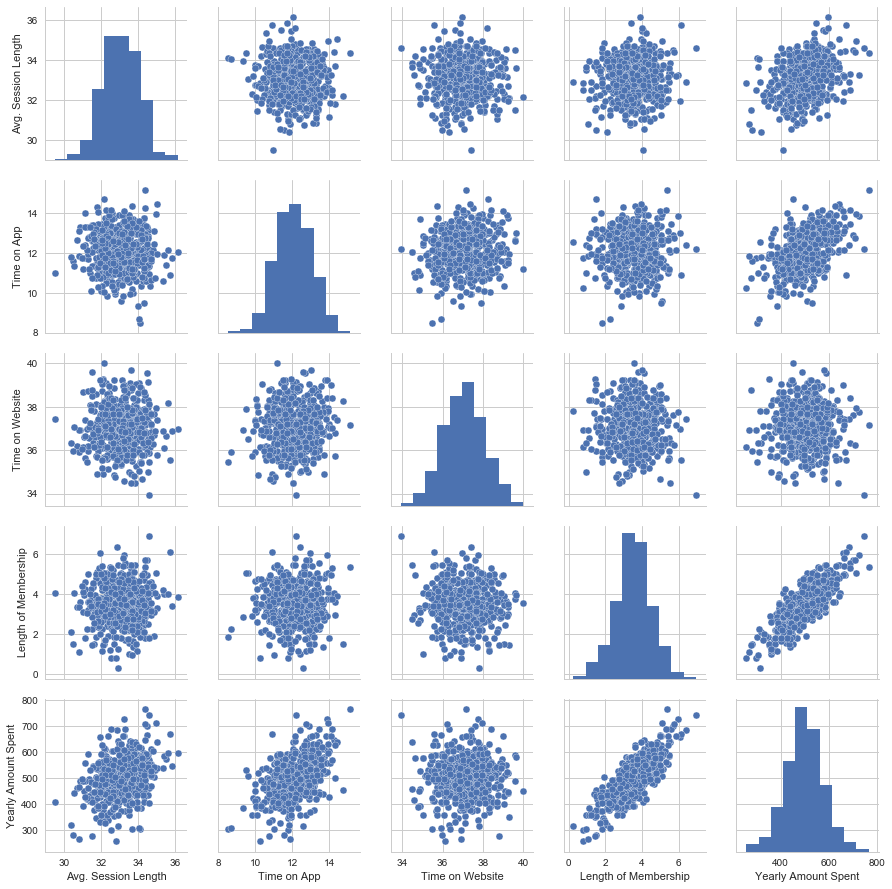

In [14]:
sns.pairplot(customers)

Based off this plot we can say that the most correlated feature with Yearly Amount Spent on purchasing store products is the Length of Membership of the customer. We will confirm this by calculating the correlation in the data. Let's do this!

In [15]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Again we see from the correlation values that the yearly amount spent by the customers on purchasing store products is correlated the most to the length of their membership with the store.

Let's create a linear model plot of  Yearly Amount Spent vs. Length of Membership.

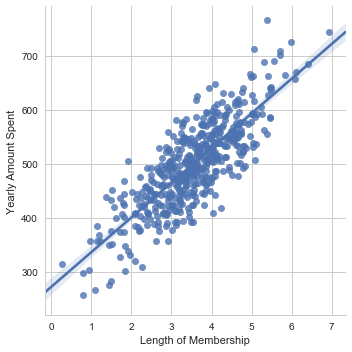

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and apply a machine learning algorithm to our data set and get some insights.

We start off by looking at what kinds of data is available in the data set. This will let us know how to split our data into training and testing data to use in our linear regression machine learning algorithm.

In [17]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Let's define our numerical features and the yearly amount spent as X & y.

In [18]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [19]:
y = customers['Yearly Amount Spent']

Alright! Now that we have our X & y, it's time to split this data into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Training the Model

Now its time to train our model on our training data!

In [23]:
from sklearn.linear_model import LinearRegression

Creating an instance of a LinearRegression() model named lm.

In [24]:
lm = LinearRegression()

Let's train our linear regression model on the training data.

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's check out the coefficients of our model.

In [26]:
print("Coefficients:", lm.coef_)

Coefficients: [ 25.08706801  38.95212228   0.30348741  61.63958061]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [27]:
predictions = lm.predict(X_test)

Let's create a scatterplot of the real test values versus the predicted values to see how they relate.

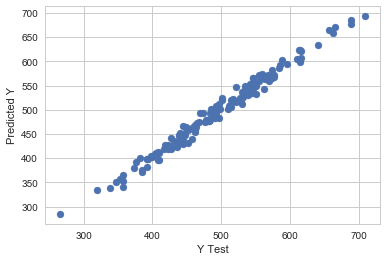

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

We see that our model is doing quite well and has performed well on the test data. There is a little bit of noise and error but it's still pretty good. But this is not enough! Let's evaluate our model numerically as well.

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [29]:
from sklearn import metrics

In [30]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

Let's present our Regresion Evaluation Metrics in a nice looking data frame.

In [34]:
rem = pd.DataFrame(data = [MAE, MSE, RMSE], index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'], columns = ['REM Values'])

In [35]:
rem

,REM Values
Mean Absolute Error,8.141613
Mean Squared Error,101.084339
Root Mean Squared Error,10.054071


Let's also calculate the explained variance score (R^2) for our model. 

In [36]:
rsquared = metrics.explained_variance_score(y_test, predictions)

In [37]:
rsquared

0.9843692630060632

We can see that our model explains about 98% of variance, so we have a very good fit model for our data.

## Residuals

So we have a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

We will plot a histogram of the residuals and make sure it looks normally distributed.

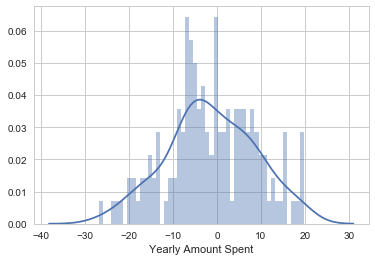

In [38]:
residuals = y_test - predictions
sns.distplot(residuals, bins = 50)

That indeed does look normally distributed!

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development?

Or maybe that doesn't even really matter, and Membership Time is what is really important as we saw earlier.

Let's see if we can interpret the coefficients at all to get an idea.

We will recreate the coefficients dataframe.

In [40]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.087068
Time on App,38.952122
Time on Website,0.303487
Length of Membership,61.639581


**Interpreting the Coefficients**

We can see that;
- Length of memberships has the highest coefficient meaning that it affects the yearly sales by the maximum amount.
- The time of app has the second highest coeffiecient and it affects the yearly sales accordingly.
- The time on website has the least coefficient value and is a very small contributor to sales.

**So should the company focus more on their mobile app or on their website?**

We can look at it in two ways;
- The website needs more work to catch up to the mobile app potential.
- The mobile app can be developed more since that is already working much better.